In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D

Etapa 1

In [3]:
# Carregando a base de dados
df = pd.read_csv('dadosacoes.csv')

In [4]:
# Visualizando as primeiras linhas
print(df.head())

  nome ação  preço ação R$  qtde cotas  valor de mercado R$ -(Bilhões)
0     VALE3            194          45                            2134
1     SUZB3             91          71                            3069
2     SUZB3            165          41                            2815
3     SUZB3             56          34                            3613
4    GOOGLE            212           9                            2975


Etapa 2

A) Plotar box plot do valor de mercado da empresa para cada ativo para verificar outliers(Utilizar
biblioteca seaborn - sns.boxplot)

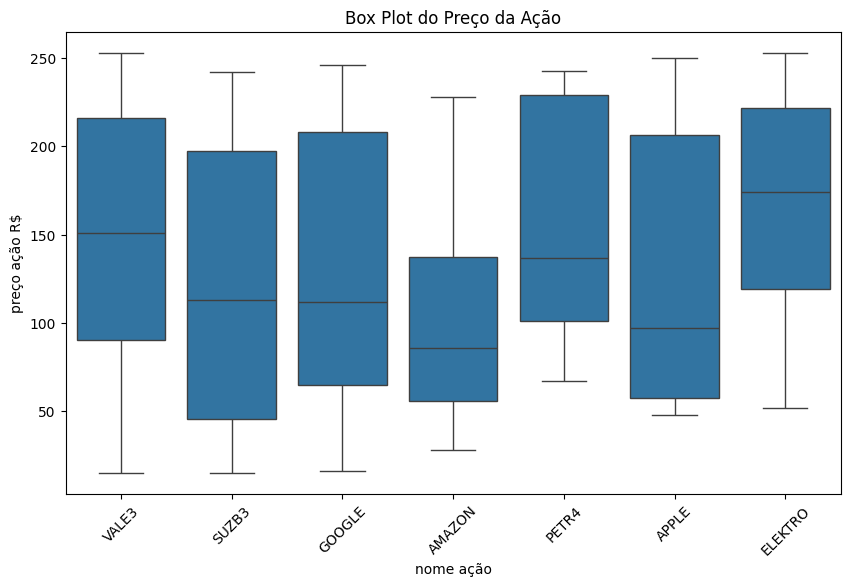

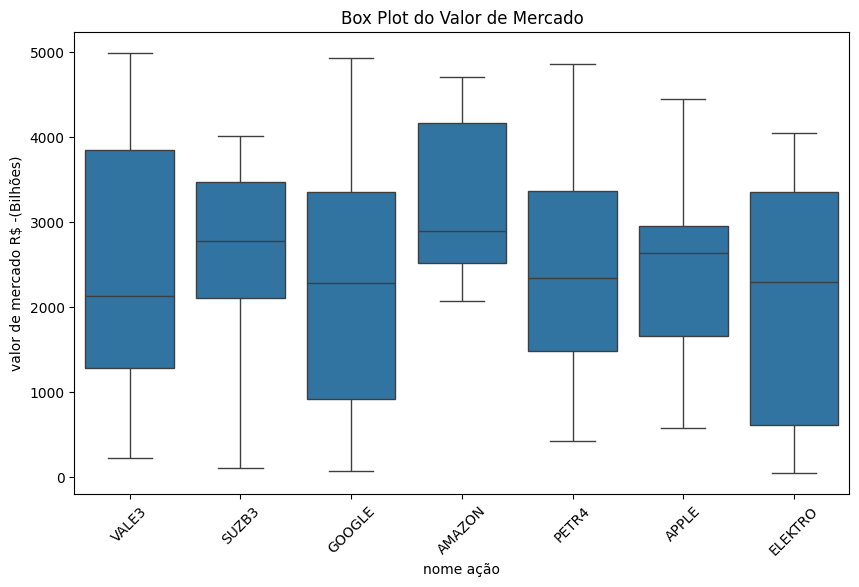

In [5]:
# Box plot do preço da ação
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='nome ação', y='preço ação R$')
plt.title('Box Plot do Preço da Ação')
plt.xticks(rotation=45)
plt.show()

# Box plot do valor de mercado
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='nome ação', y='valor de mercado R$ -(Bilhões)')
plt.title('Box Plot do Valor de Mercado')
plt.xticks(rotation=45)
plt.show()


B) Utilizar df.info() para ver informações do conjunto de dados

In [6]:
# Informações sobre o conjunto de dados
print(df.info())   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   nome ação                       100 non-null    object
 1   preço ação R$                   100 non-null    int64 
 2   qtde cotas                      100 non-null    int64 
 3   valor de mercado R$ -(Bilhões)  100 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 3.3+ KB
None


C) Utilizar df.describe para ver informações do conjunto de dados

In [7]:
# Estatísticas descritivas
print(df.describe())

       preço ação R$  qtde cotas  valor de mercado R$ -(Bilhões)
count     100.000000  100.000000                       100.00000
mean      136.140000   52.010000                      2433.70000
std        75.237942   27.475791                      1397.29373
min        15.000000    2.000000                        52.00000
25%        67.000000   28.250000                      1189.25000
50%       121.500000   55.500000                      2433.00000
75%       209.000000   76.500000                      3616.50000
max       253.000000   97.000000                      4993.00000


Etapa 3

In [8]:
# Verificando valores ausentes
print(df.isnull().sum())

# Codificação de variáveis categóricas
df = pd.get_dummies(df, columns=['nome ação'], drop_first=True)

nome ação                         0
preço ação R$                     0
qtde cotas                        0
valor de mercado R$ -(Bilhões)    0
dtype: int64


Etapa 4

Configuração inicial com n_clusters=4

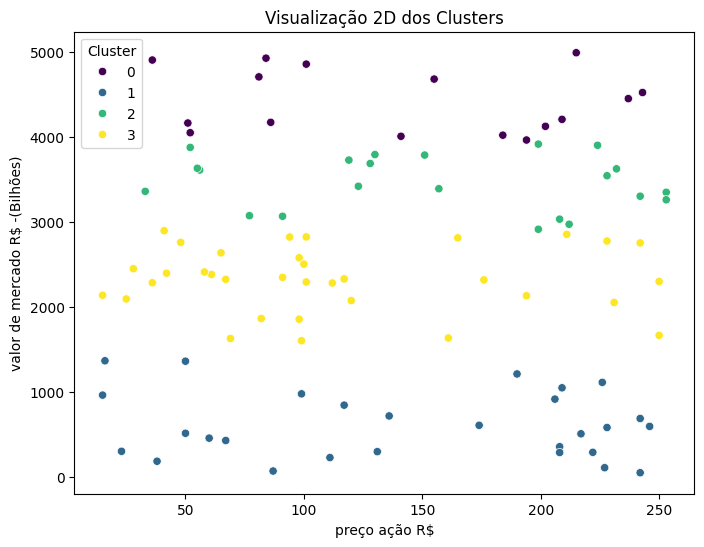

In [9]:
# Seleção das colunas relevantes
X = df[['preço ação R$', 'qtde cotas', 'valor de mercado R$ -(Bilhões)']]

# Modelo K-Means
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# Visualização 2D dos clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='preço ação R$', y='valor de mercado R$ -(Bilhões)', hue='Cluster', palette='viridis')
plt.title('Visualização 2D dos Clusters')
plt.show()


A) Alterar o número de clusters para 5 e verificar o que acontece com os grupos formados

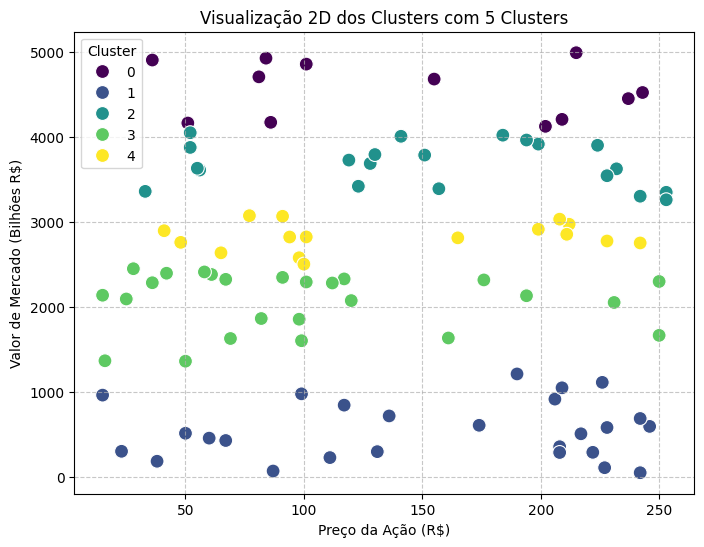

In [10]:
# K-Means com 5 clusters
kmeans_5 = KMeans(n_clusters=5, random_state=42)
df['Cluster_5'] = kmeans_5.fit_predict(X)

# Visualização 2D dos clusters com 5 clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df, 
    x='preço ação R$', 
    y='valor de mercado R$ -(Bilhões)', 
    hue='Cluster_5', 
    palette='viridis', 
    s=100  # Tamanho dos pontos
)
plt.title('Visualização 2D dos Clusters com 5 Clusters')
plt.xlabel('Preço da Ação (R$)')
plt.ylabel('Valor de Mercado (Bilhões R$)')
plt.legend(title='Cluster', loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


B) Alterar o número de clusters para 8 e verificar o que acontece com os grupos formados

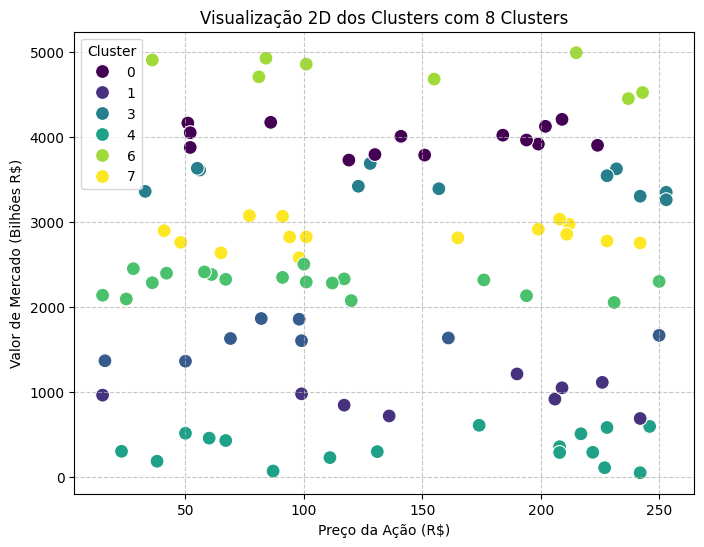

In [11]:
# K-Means com 8 clusters
kmeans_8 = KMeans(n_clusters=8, random_state=42)
df['Cluster_8'] = kmeans_8.fit_predict(X)

# Visualização 2D dos clusters com 8 clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df, 
    x='preço ação R$', 
    y='valor de mercado R$ -(Bilhões)', 
    hue='Cluster_8', 
    palette='viridis', 
    s=100  # Tamanho dos pontos
)
plt.title('Visualização 2D dos Clusters com 8 Clusters')
plt.xlabel('Preço da Ação (R$)')
plt.ylabel('Valor de Mercado (Bilhões R$)')
plt.legend(title='Cluster', loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


C) Plotar o gráfico do cotovelo para n variando de 1 a 8 clusters

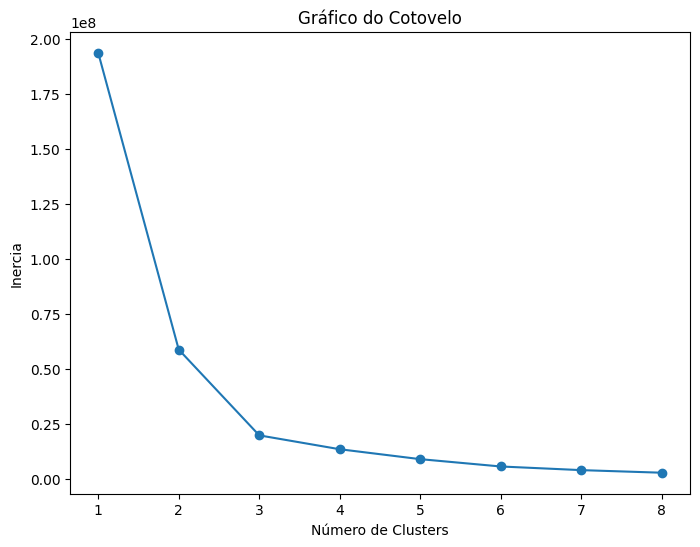

In [12]:
# Avaliação do melhor número de clusters
cotovelo = []
for n in range(1, 9):
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(X)
    cotovelo.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 9), cotovelo, marker='o')
plt.title('Gráfico do Cotovelo')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.show()


D) Plotar o gráfico da silhueta

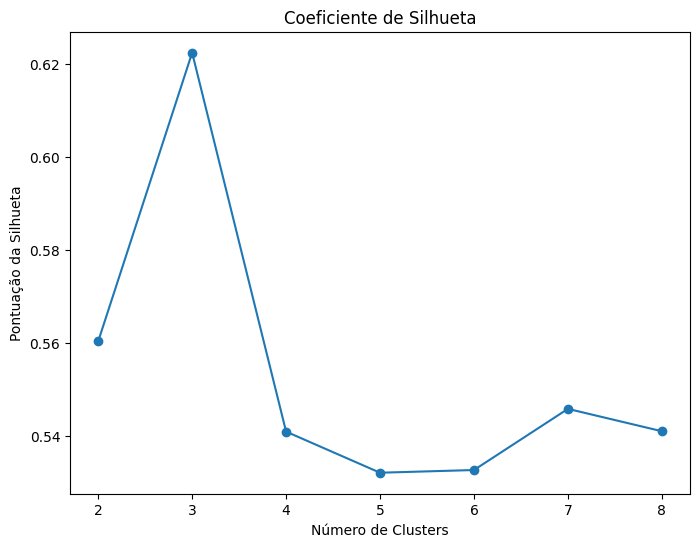

In [13]:
silhouette_scores = []
for n in range(2, 9):
    kmeans = KMeans(n_clusters=n, random_state=42)
    labels = kmeans.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, labels))

plt.figure(figsize=(8, 6))
plt.plot(range(2, 9), silhouette_scores, marker='o')
plt.title('Coeficiente de Silhueta')
plt.xlabel('Número de Clusters')
plt.ylabel('Pontuação da Silhueta')
plt.show()


Etapa 5

A) Visualização 2d dos clusters formados

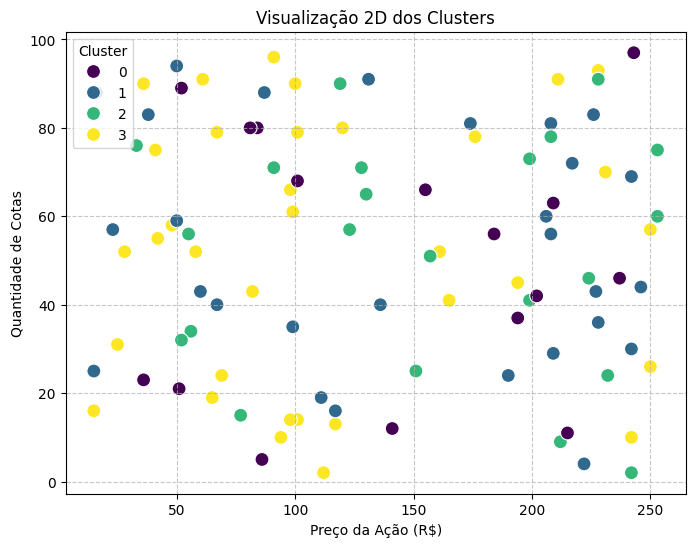

In [14]:
# Visualização 2D dos clusters com 4 clusters (ou outro número de clusters)
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df, 
    x='preço ação R$', 
    y='qtde cotas', 
    hue='Cluster', 
    palette='viridis', 
    s=100  # Tamanho dos pontos
)
plt.title('Visualização 2D dos Clusters')
plt.xlabel('Preço da Ação (R$)')
plt.ylabel('Quantidade de Cotas')
plt.legend(title='Cluster', loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


B) Visualização 3d dos clusters formados

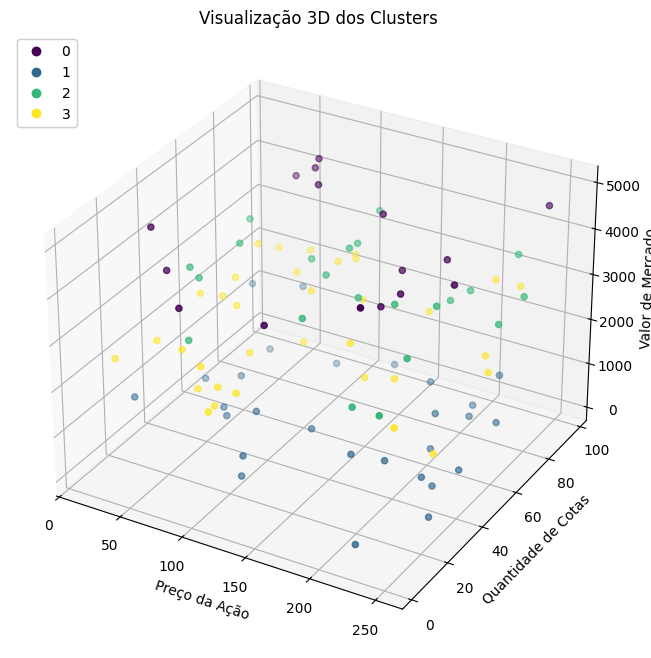

In [15]:
# Configurando visualização 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(df['preço ação R$'], df['qtde cotas'], df['valor de mercado R$ -(Bilhões)'], c=df['Cluster'], cmap='viridis')
legend = ax.legend(*scatter.legend_elements(), loc="upper left")
ax.add_artist(legend)

ax.set_xlabel('Preço da Ação')
ax.set_ylabel('Quantidade de Cotas')
ax.set_zlabel('Valor de Mercado')
plt.title('Visualização 3D dos Clusters')
plt.show()


5 - Qual a maior vantagem do aprendizado não supervisionado diante o aprendizado supervisionado ?

A principal vantagem do aprendizado não supervisionado é sua capacidade de identificar padrões e estruturas ocultas em dados sem a necessidade de rótulos pré-definidos. Isso é útil para explorar grandes conjuntos de dados e encontrar agrupamentos ou associações que podem guiar análises futuras, como no caso dos clusters formados com K-Means. Em contrapartida, o aprendizado supervisionado depende de dados rotulados, o que exige mais tempo e esforço para preparação.